In [1]:
import tensorflow as tf
import xarray as xr
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
feature_data    = '/glade/work/hardt/ds612/model2_00minuteAfterHour_3D_refl_scaled-test.nc'
label_data      = '/glade/work/hardt/ds612/model2_composite_W_scaled-test.nc'

xds = xr.open_dataset(feature_data)
x = xds.REFL_10CM.values
#x = x[7648:9568,:,:]


yds = xr.open_dataset(label_data)
y = yds.W.values
#y = y[7648:9568,:,:]

In [3]:
print(x.shape)
x = x[:,:,:,:].max(axis=1)
print(x.shape)
print(y.shape)

(1224, 10, 256, 256)
(1224, 256, 256)
(1224, 256, 256)


In [4]:
plt_number = 1000
d1 = x[plt_number,:,:]
print(d1.shape)
d2 = y[plt_number,:,:]
print(d2.shape)

(256, 256)
(256, 256)


In [5]:
#x = np.ma.masked_where(((x<0.001)&(y<1.0)), x)
#y = np.ma.masked_where(((x<0.001)&(y<1.0)), y)

In [6]:
fx = x.copy()
#fx = np.ma.masked_where(((x<0.01)&(y<1.0)), fx)
fx[((x<.001)&(y<1.0))]=-99

In [7]:
print(fx[1,:,:])

[[-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]
 ...
 [-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]
 [-99. -99. -99. ... -99. -99. -99.]]


In [8]:
fy = y.copy()
#fy = gaussian_filter(fy, sigma=1)
#fy = gaussian_filter(y, sigma=3)
#fy[fy<0.5]=0
#fy = np.ma.masked_where(((x<0.01)&(y<1.0)), fy)
fy[((x<.001)&(y<1.0))]=-99

In [9]:
print(fx.shape)
print(fy.shape)

(1224, 256, 256)
(1224, 256, 256)


In [10]:
plt_number = 1000
d1 = fx[plt_number,:,:]
print(d1.shape)
d2 = fy[plt_number,:,:]
print(d2.shape)

(256, 256)
(256, 256)


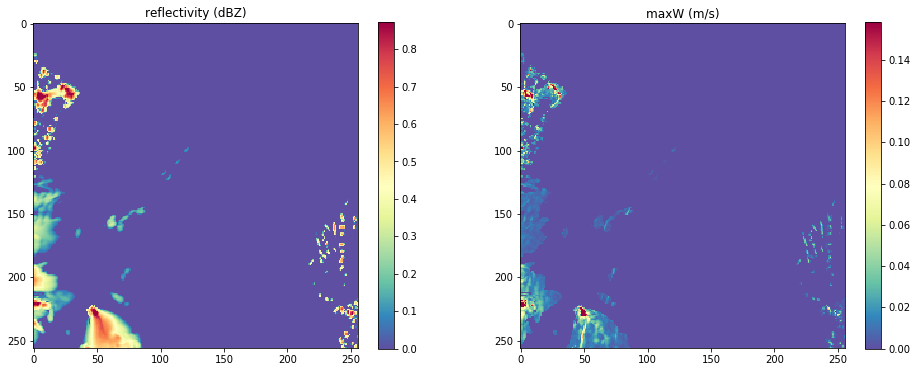

In [11]:

cmap = plt.cm.Spectral_r

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6)) 

max_ref = np.amax(d1[:,:])
p_ref = np.percentile(d1[:,:], 99.9)

ref = ax1.imshow(d1, cmap=cmap)
ax1.set_title("reflectivity (dBZ)")
ref.set_clim(vmin=0, vmax=p_ref)
fig.colorbar(ref, ax=ax1, orientation='vertical', label='')

max_maxW = np.amax(d2[:,:])
p_maxW = np.percentile(d2[:,:], 99.9)

maxW = ax2.imshow(d2, cmap=cmap)
ax2.set_title("maxW (m/s)")
#maxW.set_clim(vmin=0.0, vmax=p_maxW)
maxW.set_clim(vmin=0.0,vmax=p_maxW)
fig.colorbar(maxW, ax=ax2)

#plt.savefig("test.png")

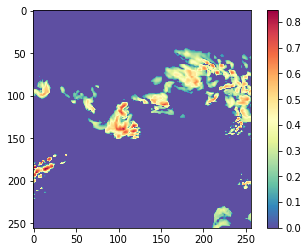

In [12]:
plt.clf()
plt.imshow(x[27,:,:], plt.cm.Spectral_r)
plt.colorbar()

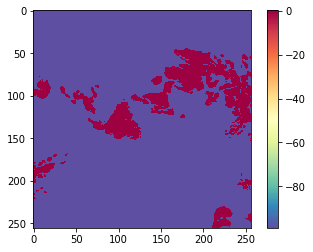

In [13]:
plt.clf()
plt.imshow(y[27,:,:], plt.cm.Spectral_r)
plt.colorbar()

In [14]:
image_range = range(20,24,1)

for i in image_range:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))   
    d1 = x[i,:,:]
    max_ref = np.amax(d1[:,:])
    p_ref = np.percentile(d1[:,:], 99.9)

    ref = ax1.imshow(d1, cmap=cmap)
    ax1.set_title("reflectivity (dBZ)")
    ref.set_clim(vmin=0, vmax=40)
    fig.colorbar(ref, ax=ax1)

    d2 = y[i,:,:]
    max_maxW = np.amax(d2[:,:])
    p_maxW = np.percentile(d2[:,:], 99.9)

    maxW = ax2.imshow(d2, cmap=cmap)
    ax2.set_title("maxW (m/s)")
    maxW.set_clim(vmin=0.5, vmax=3)
    fig.colorbar(maxW, ax=ax2)
    
    plt.savefig("image_" + str(i) + ".png")
    plt.clf()


<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

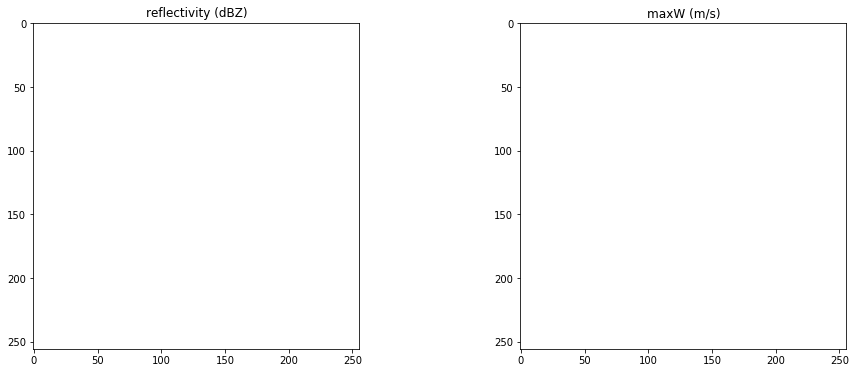

In [15]:
from celluloid import Camera
import ffmpeg

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))   

camera = Camera(fig)
image_range = range(970,1010,1)

for i in image_range:
#    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))   
    d1 = x[i,:,:]
    max_ref = np.amax(d1[:,:])
    p_ref = np.percentile(d1[:,:], 99.9)

    ref = ax1.imshow(d1, cmap=cmap)
    ax1.set_title("reflectivity (dBZ)")
    ref.set_clim(vmin=0, vmax=40)
    #fig.colorbar(ref, ax=ax1)

    d2 = y[i,:,:]
    max_maxW = np.amax(d2[:,:])
    p_maxW = np.percentile(d2[:,:], 99.9)

    maxW = ax2.imshow(d2, cmap=cmap)
    ax2.set_title("maxW (m/s)")
    maxW.set_clim(vmin=0.5, vmax=3)
    #fig.colorbar(maxW, ax=ax2)
    camera.snap()

animation = camera.animate(interval=500, repeat_delay=1000, repeat=2)
animation.save('celluloid_subplots.gif', writer = 'imagemagick')

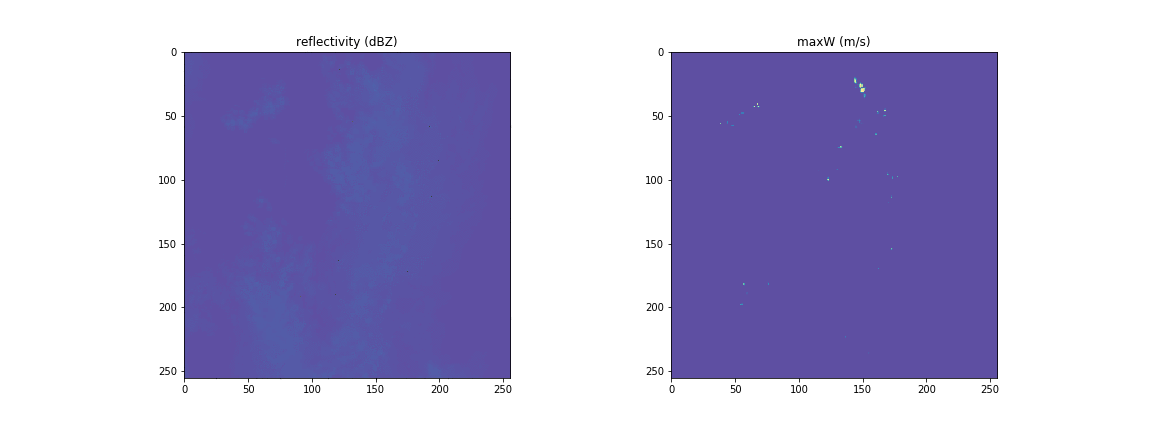

In [16]:
from IPython.display import Image
with open('celluloid_subplots.gif','rb') as file:
    display(Image(file.read()))


In [ ]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

ani.save("test.gif", writer="imagemagick")
